In [23]:
# Importing libraries
import pandas as pd

In [8]:
# Reading csv file
df = pd.read_csv('train_ship_segmentations_v2.csv')
df.head(10)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...
8,0001b1832.jpg,NaN
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...


In [14]:
# Adding column for number of ships
df['ShipsNumber'] = df['EncodedPixels'].apply(lambda x: 1 if type(x) == str else 0)
df.head(10)

,ImageId,EncodedPixels,ShipsNumber
0,00003e153.jpg,NaN,0
1,0001124c7.jpg,NaN,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...,1
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...,1
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...,1
8,0001b1832.jpg,NaN,0
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1


In [35]:
# Creating datagrame for the number of ships
ships = df.groupby('ImageId')['ShipsNumber'].sum().reset_index()
ships.head(10)

,ImageId,ShipsNumber
0,00003e153.jpg,0
1,0001124c7.jpg,0
2,000155de5.jpg,1
3,000194a2d.jpg,5
4,0001b1832.jpg,0
5,00021ddc3.jpg,9
6,0002756f7.jpg,2
7,0002d0f32.jpg,0
8,000303d4d.jpg,0
9,00031f145.jpg,1


array([[<Axes: title={'center': 'ShipsNumber'}>]], dtype=object)

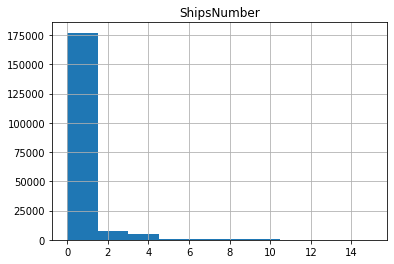

In [36]:
# Histogram of number of ships
ships[['ShipsNumber']].hist()

In [37]:
# Dropping 0-ships rows
ships = ships[ships.ShipsNumber != 0]
ships.head(10)

,ImageId,ShipsNumber
2,000155de5.jpg,1
3,000194a2d.jpg,5
5,00021ddc3.jpg,9
6,0002756f7.jpg,2
9,00031f145.jpg,1
11,000532683.jpg,2
12,00053c6ba.jpg,1
15,0005d01c8.jpg,2
16,0005d6d95.jpg,1
17,0006c52e8.jpg,1


array([[<Axes: title={'center': 'ShipsNumber'}>]], dtype=object)

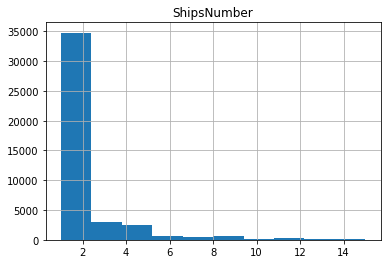

In [38]:
# Histogram of number of ships without 0-ships rows
ships[['ShipsNumber']].hist()

In [46]:
# Defining function for calculating square of ship with giving row-line-decoded string
def square(pixels):
    pixels = pixels.split(' ')
    pixels = [int(x) for x in pixels]
    return sum(pixels[1::2])

# Adding column for square of ships (the whole square of every picture is about 600 000)
df['Square'] = df['EncodedPixels'].apply(lambda x: square(x) if type(x) == str else 0)
df.head(10)

,ImageId,EncodedPixels,ShipsNumber,Square
0,00003e153.jpg,NaN,0,1
1,0001124c7.jpg,NaN,0,1
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1,3388
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1,177
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1,148
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...,1,480
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...,1,7
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...,1,648
8,0001b1832.jpg,NaN,0,1
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1,400
